# Introduction to _explorationlib_.

This section has two goals. First to get you familiar with the python library used throughout to simulate and explore exploration. Second, is to get familiar with running that code online using Google's colaboratory.


Google colab is a simple free way to run python code. See the _python_ chapter for more on it. Most of the chapters and assignments in this book have a button to open in colab. This notebook is a simple compact test for all the others. A quick way to make sure the rest should work. 

This section has two assignments.

## Assignment 1

Use the button to open this assignment in a colab. Once it is open, if it is open, run all the cells. Read each cell, then run it, that is. This simple test of the colab is also a good but basic introduction to _explorationlib_, which is the basis for all the experiments and assignments you will see.

If there are no errors, celebrate and consider _this_ assignment complete. 

_Note:_ I assume that you, reader, are familiar with python programming already. If you are not, see the _Introduction to python_ assignment.

### Install _explorationlib_
Colab's come with many of the libraries we will need. It does not come with _explorationlib_. It's a module we will be using, and was written to support this book. Let's Install it.

In [ ]:
!pip install git+https://github.com/parenthetical-e/explorationlib
!pip install celluloid # for the gifs

### Import some modules
From the standard library

In [2]:
import shutil
import glob
import os
import copy
import sys

that are common to scientific programming in python

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import a bunch of functions from _explorationlib_. If our install using _pip_ above worked out, this next cell should run without error.

In [4]:
# All the explorers we will play with are called
# "agents"; a bit of computer science jargon
from explorationlib import agent

# The environments we will simulate live in a "gym"
from explorationlib import local_gym as gym

# Computational experiments are run with 'experiment'
from explorationlib.run import experiment

# Here are some tools to select, save, and load
# data from computational experiments
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# A bunch of tools for plotting and for
# movie making
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import render_2d
from explorationlib.plot import show_gif

# A couple metrics for scoring how well, or poorly,
# an exploration experiment went.
from explorationlib.score import search_efficiency
from explorationlib.score import average_reward

### Configure plots 
to be be nicer looking. We don't _have_ to do this, but _why not_?

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

### Better autocomplete and development
In our notebooks. Again, optional. If this errors out, and it might, skip it.

In [6]:
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

## "data/"
Make a folder to keep experimental data in. We will use it for all our examples.

**WARNING** When running in a colab, anything you save to "data/" will be lost as soon as you shutdown the colab. This is ok for now. We will cover ways to save your data permanently later on.

In [7]:
if not os.path.exists("data"):
    os.makedirs("data")

### Run a simple experiment using _explorationlib_
1. Instantiate a random walker, in a small 2d box environment, with walls and a lot of targets to find when exploring. Each target should have a value of '1'.
2. Run an experiment, for 200 steps. 
3. Plot the env, target, the agents path in the experiment. 
4. Make a movie of experiment.
5. Score the agent, and reward (targets), and its efficiency.

#### Instantiate

In [48]:
# Parameters
exp_name = "data/explorationlib_a1.pkl"   # all experiments need names
num_experiments = 1             # we only want to run one experiment 
num_steps = 200                 # how many exploration steps in space?

scale = 2             # The noise scale; the diffusion constant
detection_radius = 1  # How far can the agent see?
boundary = (10, 10)   # a 2d world, 10 by 10
mode = "stopping"     # stop when we hit a wall
num_targets = 100     # how many thingss to "eat"?

# Setup targets. Targets are an abstraction for the
# thing we are exploring to find. For now, all targets
# are just the number 1 placed randomly about.
targets = gym.uniform_targets(num_targets, boundary)
values = gym.constant_values(targets, 1)

# Setup agent and env
env = gym.Bounded(boundary=boundary, mode=mode)
env.add_targets(targets, values)
brownian = agent.Diffusion2d(scale=scale)

#### Run

In [ ]:
# Cleanup old versions
for path in glob.glob(f"{exp_name}"):
    os.remove(path)

In [54]:
# Run!
experiment(exp_name, brownian, env, num_steps=num_steps, num_experiments=num_experiments)
exp_data = load(exp_name)

colab_test_simple: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


#### Plot

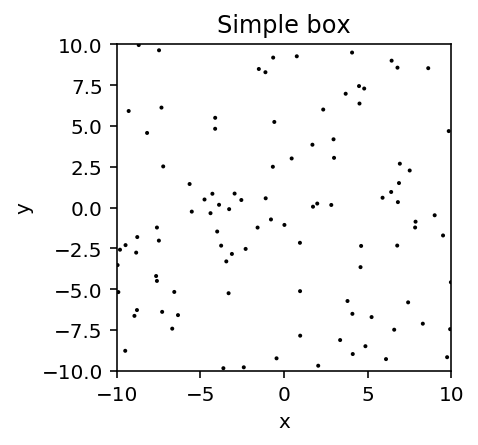

In [55]:
# Plot the 2d env, and the targets (black dots)
plot_targets2d(env, boundary=boundary, title="Simple box", figsize=(3,3))

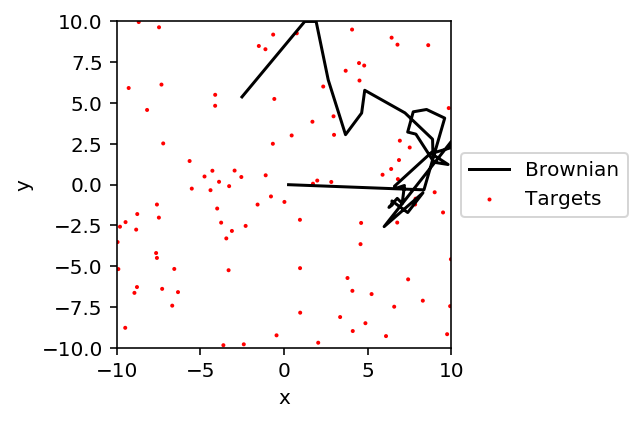

In [56]:
# Plot the positions the agent took during its
# random walk, and the targets (this time in red)
#
# Note: there are quite a few parameters you can play
# with to change the size of the plot, colors, and so on.
# See `explorationlib.plot` for all the options

# Agent
ax = None
ax = plot_position2d(
    exp_data,
    boundary=boundary,
    label="Brownian",
    color="black",
    alpha=1,
    ax=ax,
)
# Targets
ax = plot_targets2d(
    env,
    boundary=boundary,
    color="red",
    alpha=1,
    label="Targets",
    ax=ax,
)

#### Score

In [60]:
average_reward(exp_data)

0.48743718592964824

In [1]:
search_efficiency(exp_data)

NameError: name 'search_efficiency' is not defined

_Direction_: Go back to the top of this section, and run it again. Each time you do you should generate a new exploration. You'll get different rewards and efficiency each time as well.

_Question_: How much variation do you see from run to run? More to the point, if this was how you _had_ to explore the world, how well do you think you'd do? 

## Assignment 2
Let's run our first real experiment. Let's assume that the walker from Assignment 1 has the optimal scale of noise to search its 10 by 10 box, with walls. (This is not tru but put that aside). Now, what if the "world" (its box) suddenly got ten times bigger, but the number of targets stayed the same.... 

The goal of this experiment is to find out, with your acting as an oracle. Can you help the walker discover a new noise scale that improves, or returns, the search efficient to its previous value?

In [14]:
# First rerun the experiment with many more repeats, 
# so we get a stable estimate of the baseline value

# Parameters
exp_name = "data/explorationlib_a2_10.pkl"  
scale=2                           # The noise scale; the diffusion constant
num_experiments = 200             # 200 repeats!
num_steps = 200                   # how many exploration steps in space?

detection_radius = 1  # How far can the agent see?
boundary = (10, 10)   # a 2d world, 10 by 10
mode = "stopping"     # stop when we hit a wall
num_targets = 100     # how many thingss to "eat"?

# Setup targets. Targets are an abstraction for the
# thing we are exploring to find. For now, all targets
# are just the number 1 placed randomly about.
targets = gym.uniform_targets(num_targets, boundary)
values = gym.constant_values(targets, 1)

# Setup agent and env
env = gym.Bounded(boundary=boundary, mode=mode)
env.add_targets(targets, values)
brownian = agent.Diffusion2d(scale=scale)

# Cleanup old versions
for path in glob.glob(f"{exp_name}"):
    os.remove(path)

# Run!
experiment(exp_name, brownian, env, num_steps=num_steps, num_experiments=num_experiments)
exp_data = load(exp_name)

# Score
scores = search_efficiency(exp_data)
print(f">>> Mean {np.mean(scores)}, SD: {np.std(scores)}")

explorationlib_a2_10: 100%|██████████| 200/200 [00:10<00:00, 18.20it/s]
>>> Mean 1.5621350979920425, SD: 0.3153409911794343


Now increase the `boundary` to be a (100, 100) box, and rerun the experiment above. _Note_: You can just copy the code, BUT make sure to choose a new `exp_name` as well.

_Question_: Is a scale of 2 still optimal? 

In [15]:
# Put your code here.

Once you rerun with the big boundary, you will have an estimate for how the search efficiency has dropped. Now, rerun the experiment but this time experiment with different values of `scale`. 

_Question_: how much can you improve the mean score? 

In [ ]:
# Put your code here.